<a href="https://colab.research.google.com/github/shab-sa/cs_internship/blob/main/Step9/Fraud%20Detection%20copy%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
file=zipfile.ZipFile('emails.csv.zip')
file.extractall()

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wcukierski/enron-email-dataset

In [ ]:
! unzip enron-email-dataset.zip

In [1]:
import pandas  as pd
df=pd.read_csv('emails.csv')

In [2]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [3]:
df["message"][0].split("\n")

['Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>',
 'Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: tim.belden@enron.com',
 'Subject: ',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Tim Belden <Tim Belden/Enron@EnronXGate>',
 'X-cc: ',
 'X-bcc: ',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Here is our forecast',
 '',
 ' ']

In [4]:
import re
def create_dataframe(series):
    data = []
    #for line in series.split('\n'):
        #data.append(dict(re.findall(r"(Message-ID|Date|From|To|Subject|Mime-Version|Content-Type|Content-Transfer-Encoding|X-From|X-To|X-cc|X-bcc|X-Folder|X-Origin|X-FileName)\s*:\s*([^\s]+)", line)))
        #data1={k:v for element in data for k,v in element.items()}
#    data1={}
    d=' '.join(series.split('\n')[15:]).strip()
    return d

In [5]:
df['text'] = df['message'].map(create_dataframe)
#df_splited = pd.DataFrame.from_records(df1).fillna("")

In [6]:
print(df.shape)

(517401, 3)


In [7]:
df=df.drop(columns=['file','message'])

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(313411, 1)

In [10]:
import nltk
#nltk.download('stopwords')

In [11]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
stop = stopwords.words('english')
#tag=0
#emo=0
def tokenizer(text):
    #global tag,emo
    #text = re.sub('<[^>]*>', '', text)
    #if re.findall('<[^>]*>', text):
        #tag += 1
    #emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    #if emoticons:
        #emo += 1
    #text = re.sub('[\d]', '', text)
    text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    #tokenized = [WordNetLemmatizer().lemmatize(w) for w in tokenized]
    #tokenized = [PorterStemmer().stem(w) for w in tokenized]
    t=' '.join(tokenized)
    return t

<>:17: SyntaxWarning: invalid escape sequence '\W'
<>:17: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Shabnam\AppData\Local\Temp\ipykernel_6204\3136981412.py:17: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')


In [12]:
df['text']=df['text'].map(tokenizer)

In [13]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#count = CountVectorizer()
tfidf = TfidfVectorizer()#use_idf=True, norm='l2', smooth_idf=True)
#np.set_printoptions(precision=2)
x_train = tfidf.fit_transform(df['text'])
print(x_train)

  (0, 333911)	1.0
  (1, 608025)	0.047992507040428324
  (1, 468978)	0.06729240987311319
  (1, 580739)	0.12074663818057395
  (1, 332769)	0.12489732265593645
  (1, 398103)	0.1359648452995758
  (1, 218819)	0.13718326236567024
  (1, 576326)	0.2643596389176104
  (1, 544048)	0.12655515316516427
  (1, 350326)	0.11630136265419078
  (1, 513538)	0.09417927709679484
  (1, 195623)	0.10186390161838729
  (1, 349754)	0.061010366103055616
  (1, 592297)	0.11608235988057766
  (1, 334235)	0.09742182727454858
  (1, 284095)	0.06870109816462103
  (1, 598039)	0.08813201560984679
  (1, 554049)	0.10147372351501645
  (1, 364830)	0.08568681775787687
  (1, 211285)	0.07732572597687819
  (1, 458107)	0.07396837967504973
  (1, 617346)	0.08794349388142064
  (1, 642944)	0.09921325911467217
  (1, 533911)	0.12892617585673274
  (1, 497766)	0.07695269073714538
  :	:
  (313410, 647155)	0.02643890658524753
  (313410, 448834)	0.03930952109488218
  (313410, 549495)	0.030971312861948222
  (313410, 591465)	0.04000313847186345
  (

In [14]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=2, random_state=42)
x_train_r=model.fit_transform(x_train)

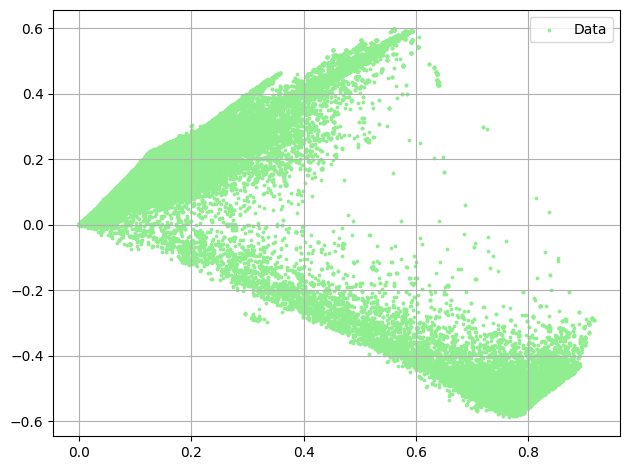

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[:, 0], x_train_r[:, 1], s=3, c='lightgreen', label='Data')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=2, max_iter=100, n_init=1, random_state=42).fit(x_train)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to cluster {cluster_ids}: {cluster_sizes}")

Number of elements assigned to cluster [0 1]: [295477  17934]


In [17]:
y=KMeans.predict(kmeans, x_train)
kmeans.cluster_centers_.shape

(2, 678440)

In [18]:
kmeans.cluster_centers_

array([[1.04401084e-02, 4.63483695e-03, 1.36152773e-04, ...,
        9.22200193e-08, 2.19137542e-08, 7.83137728e-07],
       [2.88460016e-03, 2.57604307e-03, 1.68233632e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

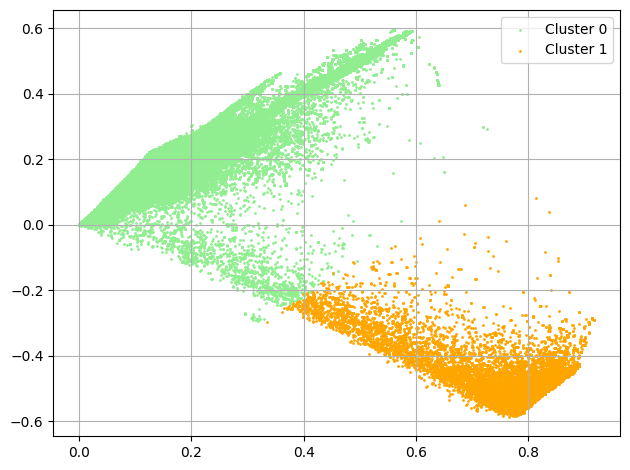

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[y == 0, 0], x_train_r[y == 0, 1], s=1, c='lightgreen', label='Cluster '+str(cluster_ids[0]))
plt.scatter(x_train_r[y == 1, 0], x_train_r[y == 1, 1], s=1, c='orange', label='Cluster '+str(cluster_ids[1]))
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='yellow', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x_train_r, kmeans.labels_, metric='euclidean', sample_size=10000)
print(score)

0.8332919322244892


In [21]:
features = tfidf.get_feature_names_out()
tfidf_sorting = kmeans.cluster_centers_.argsort()[:,::-1]

In [22]:
for i in range(2):
    print(f'cluster {cluster_ids[i]}:')
    print(features[tfidf_sorting[i,:20]])

cluster 0:
['com' 'enron' 'ect' 'hou' '2001' 'please' 'subject' 'thanks' 'pm' '20'
 'message' 'sent' 'filename' '2000' 'would' 'cc' 'know' 'mail' 'origin'
 'original']
cluster 1:
['cn' 'recipients' 'ou' 'na' 'enron' 'com' 'pdavis1' 'notesaddr' 'pete'
 'davis' 'ryan' 'slinger' 'non' 'privileged' 'williams' 'john' 'solberg'
 'bcc' 'meyers' 'schedules']
